In [41]:
#|!pip install jsonlines
#!pip install pandas
#!pip install transformers
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 9.2 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 92.2 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 98.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 111.9 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 50.2 MB/s eta 0:00:01


In [38]:
import jsonlines 
import pandas as pd
from transformers import pipeline
from transformers.pipelines.pt_utils import KeyDataset
from tqdm.auto import tqdm
import json
from io import StringIO
import matplotlib.pyplot as plt
from matplotlib.patches import Circle 

In [2]:
rutas = ["/home/julieta/LanAn/aguadiana4-3_tweetsResCont.txt", 
         "/home/julieta/LanAn/manolojim4-3_tweetsResCont.txt" ,
         "/home/julieta//LanAn/leninperezr4-3_tweetsResCont.txt",  
         "/home/julieta/LanAn/AlejandraDMV4-3_tweetsResCont.txt",  
         "/home/julieta/LanAn/delfinagomeza4-3_tweetsResCont.txt"]

In [3]:
df = pd.DataFrame()
for ruta in rutas:
    df = pd.concat([df, pd.read_json(ruta, lines=True)], ignore_index=True)
df

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,bookmarkCount,pinned,editState,content,outlinks,outlinksss,tcooutlinks,tcooutlinksss,username,_snscrape
0,snscrape.modules.twitter.Tweet,https://twitter.com/cjauglez/status/1643767467...,2023-04-06 00:07:58+00:00,@aguadiana Don canguro,@aguadiana Don canguro,1643767467494481925,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@aguadiana Don canguro,[],,[],,cjauglez,0.6.2.20230321.dev50+g0d824ab
1,snscrape.modules.twitter.Tweet,https://twitter.com/Roberto61609862/status/164...,2023-04-05 02:37:10+00:00,@aguadiana El cambio https://t.co/qX6OreFnCW,@aguadiana El cambio https://t.co/qX6OreFnCW,1643442625922383873,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@aguadiana El cambio https://t.co/qX6OreFnCW,[],,[],,Roberto61609862,0.6.2.20230321.dev50+g0d824ab
2,snscrape.modules.twitter.Tweet,https://twitter.com/cuchoalbert/status/1643387...,2023-04-04 22:56:15+00:00,@aguadiana El cambio https://t.co/mNXSDlGinx,@aguadiana El cambio https://t.co/mNXSDlGinx,1643387032310370304,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@aguadiana El cambio https://t.co/mNXSDlGinx,[],,[],,cuchoalbert,0.6.2.20230321.dev50+g0d824ab
3,snscrape.modules.twitter.Tweet,https://twitter.com/Franky61529058/status/1643...,2023-04-04 21:29:52+00:00,@aguadiana Para cuando te estas alineando con ...,@aguadiana Para cuando te estas alineando con ...,1643365291630510085,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,1,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@aguadiana Para cuando te estas alineando con ...,[],,[],,Franky61529058,0.6.2.20230321.dev50+g0d824ab
4,snscrape.modules.twitter.Tweet,https://twitter.com/pavzqzo/status/16431440579...,2023-04-04 06:50:46+00:00,@aguadiana gordito cochino te usaron. el deal ...,@aguadiana gordito cochino te usaron. el deal ...,1643144057953173507,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@aguadiana gordito cochino te usaron. el deal ...,[],,[],,pavzqzo,0.6.2.20230321.dev50+g0d824ab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8969,snscrape.modules.twitter.Tweet,https://twitter.com/SocCivilMoreUSA/status/164...,2023-04-03 06:23:51+00:00,@Naye1i @delfinagomeza estás en drogas? O solo...,@Naye1i @delfinagomeza estás en drogas? O solo...,1642774896848805888,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@Naye1i @delfinagomeza estás en drogas? O solo...,[],,[],,SocCivilMoreUSA,0.6.2.20230321.dev50+g0d824ab
8970,snscrape.modules.twitter.Tweet,https://twitter.com/Ensoma/status/164277441869...,2023-04-03 06:21:57+00:00,@delfinagomeza Caminata con descuentos https:/...,@delfinagomeza Caminata con descuentos https:/...,1642774418697887745,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,2,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@delfinagomeza Caminata con descuentos https:/...,[],,[],,Ensoma,0.6.2.20230321.dev50+g0d824ab
8971,snscrape.modules.twitter.Tweet,https://twitter.com/chapis2607/status/16427743...,2023-04-03 06:21:50+00:00,@delfinagomeza No vas a ser gobernadora ratera...,@delfinagomeza No vas a ser gobernadora ratera...,1642774389811818496,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@delfinagomeza No vas a ser gobernadora ratera...,[],,[],,chapis2607,0.6.2.20230321.dev50+g0d824ab
8972,snscrape.modules.twitter.Tweet,https://twitter.com/YOSOYV2/status/16427738541...,2023-04-03 06:19:42+00:00,@delfinagomeza Cambio... https://t.co/pATU1Nt1Pj,@delfinagomeza Cambio... https://t.co/pATU1Nt1Pj,1642773854131986432,"{'_type': 'snscr

In [4]:
model_path = "daveni/twitter-xlm-roberta-emotion-es"
emotion_analysis = pipeline("text-classification", framework="pt", model=model_path, tokenizer=model_path)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [5]:
data = []
buffer = StringIO()

In [6]:
for i,row in tqdm(df.iterrows()):
    name = row["inReplyToUser"]
    name= str(name)
    name = name.replace("'", "\"")
    name = name.replace("None", "null")
    if i>100:
        break
    try:
        objeto_name = json.loads(name)
        try:
            figura = objeto_name["username"]
            try:
                json_res = emotion_analysis(row["rawContent"])
                print(json_res, file=buffer)
                json_res =str(json_res[0])
                json_res = json_res.replace("'", "\"");
                try:
                    obj_res = json.loads(json_res)
                    emocion = obj_res["label"]
                    porcentaje = obj_res["score"]
                    data.append ({"twitt" : row["rawContent"], "emocion" :emocion, "porcentaje" : porcentaje, "figura": figura, "fecha" : row["date"]})
                except:
                    print(json_res)
            except :
                print("Error:Modelo")
        except :
            print("Error:FIGURA")
    except json.JSONDecodeError as e:
        print("Error decoding JSON:", str(e))
    

0it [00:00, ?it/s]

In [7]:
buffer.seek(0) 
resultados_csv = pd.read_csv(buffer, delimiter=",")
ruta_archivo = "/home/julieta/LanAn/resultados.csv"
resultados_csv.to_csv(ruta_archivo, index=False)

In [8]:
df_final = pd.DataFrame(data)
df_final

,twitt,emocion,porcentaje,figura,fecha
0,@aguadiana Don canguro,others,0.896584,aguadiana,2023-04-06 00:07:58+00:00
1,@aguadiana El cambio https://t.co/qX6OreFnCW,others,0.926779,aguadiana,2023-04-05 02:37:10+00:00
2,@aguadiana El cambio https://t.co/mNXSDlGinx,others,0.926079,aguadiana,2023-04-04 22:56:15+00:00
3,@aguadiana Para cuando te estas alineando con ...,others,0.815154,aguadiana,2023-04-04 21:29:52+00:00
4,@aguadiana gordito cochino te usaron. el deal ...,anger,0.720153,aguadiana,2023-04-04 06:50:46+00:00
...,...,...,...,...,...
96,@aguadiana Jajajajaja no mamn jajajajajajaja. ...,anger,0.753197,aguadiana,2023-04-04 12:23:30+00:00
97,@aguadiana Mejía también está casi al par que tú,others,0.882306,aguadiana,2023-04-04 04:35:34+00:00
98,@aguadiana Honestamente mi voto no es para est...,anger,0.683597,aguadiana,2023-04-04 04:34:20+00:00
99,@aguadiana Ricardo Mejía será el próximo gober...,others,0.884650,aguadiana,2023-04-04 04:32:41+00:00


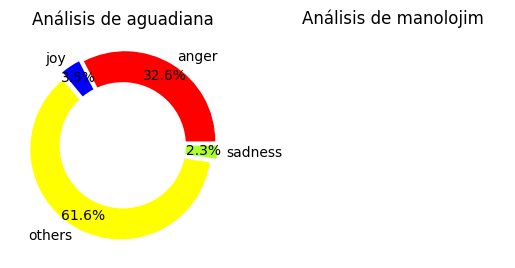

In [41]:
figs = ["aguadiana", "manolojim"]
fig, axs = plt.subplots(1,len(figs))
colors = ['#FF0000', '#0000FF', '#FFFF00',
          '#ADFF2F', '#FFA500']

for j, figura in enumerate(figs):
    cuentas =  df_final[df_final["figura"] == figura]['emocion'].value_counts(normalize = True)  
    df_sorted = cuentas.sort_index(ascending=True)
    #axs[j].bar( x= df_sorted.index.values, height = df_sorted.values)
    axs[j].set_title (f"Análisis de {figura}")
    axs[j].set_ylim (0.0, 0.9)
    explode = tuple([0.05 for x in df_sorted.index.values] )
    axs[j].pie(df_sorted.values, colors=colors, labels=df_sorted.index.values,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
    centre_circle =Circle((0, 0), 0.70, fc='white')
    axs[j].add_patch(centre_circle)

In [11]:
cuentas

emocion
others     0.616279
anger      0.325581
joy        0.034884
sadness    0.023256
Name: proportion, dtype: float64

In [21]:
df_sorted

array(['anger', 'joy', 'others', 'sadness'], dtype=object)